 ## Henry Natural Gas Webscrapping

### Import all necessary Libraries

In [5]:
import requests
from bs4 import BeautifulSoup
import csv

# URL of the website
url = "https://www.eia.gov/dnav/ng/hist/rngwhhdD.htm"

# Fetch the page content
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Find the table
table = soup.find("table", {"summary": "Henry Hub Natural Gas Spot Price (Dollars per Million Btu)"})

# Extract data
data = []
for row in table.find_all("tr"):  # Start from the very first row
    cells = row.find_all("td")
    if cells and len(cells) >= 6:  # Ensure it has the date and 5 price columns
        week_start_date = cells[0].get_text(strip=True)

        # Capture all 5 daily prices (Monday to Friday)
        for i, price in enumerate(cells[1:6], start=0):
            date = f"{week_start_date} (Day {i+1})"
            price = price.get_text(strip=True)
            if price:  # Only add rows where a price exists
                data.append([date, price])

# Save to CSV
csv_filename = "henry_hub_full_week_prices.csv"
with open(csv_filename, "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Date", "Price"])
    writer.writerows(data)

print(f"Data saved to {csv_filename}")

Data saved to henry_hub_full_week_prices.csv


In [17]:
df = pd.read_csv("henry_hub_full_week_prices.csv")
print(df.head())  # Check the first few rows
print(df.tail())  # Check the last few rows
print(df.info())

                            Date  Price
0  1997 Jan- 6 to Jan-10 (Day 2)   3.82
1  1997 Jan- 6 to Jan-10 (Day 3)   3.80
2  1997 Jan- 6 to Jan-10 (Day 4)   3.61
3  1997 Jan- 6 to Jan-10 (Day 5)   3.92
4  1997 Jan-13 to Jan-17 (Day 1)   4.00
                               Date  Price
7064  2025 Feb-17 to Feb-21 (Day 2)   6.40
7065  2025 Feb-17 to Feb-21 (Day 3)   7.15
7066  2025 Feb-17 to Feb-21 (Day 4)   5.62
7067  2025 Feb-17 to Feb-21 (Day 5)   4.43
7068  2025 Feb-24 to Feb-28 (Day 1)   3.86
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7069 entries, 0 to 7068
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    7069 non-null   object 
 1   Price   7068 non-null   float64
dtypes: float64(1), object(1)
memory usage: 110.6+ KB
None


In [22]:
import requests
from bs4 import BeautifulSoup
import csv

# URL for monthly data
url = "https://www.eia.gov/dnav/ng/hist/rngwhhdM.htm"

# Fetch the page content
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Find the table
table = soup.find("table", {"summary": "Henry Hub Natural Gas Spot Price (Dollars per Million Btu)"})

# Extract data
data = []
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Loop through table rows
for row in table.find_all("tr")[1:]:  # Start from the first data row
    cells = row.find_all("td")
    if len(cells) >= 13:  # Ensure the row has a year and 12 months of data
        year = cells[0].get_text(strip=True)
        for month_index, cell in enumerate(cells[1:13]):  # Loop through the 12 months
            price = cell.get_text(strip=True)
            if price:  # Only add rows where a price exists
                date = f"{months[month_index]}-{year}"
                data.append([date, price])

# Save to CSV
csv_filename = "henry_hub_monthly_prices.csv"
with open(csv_filename, "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Date", "Price"])
    writer.writerows(data)

print(f"Monthly data saved to {csv_filename}")

Monthly data saved to henry_hub_monthly_prices.csv


In [23]:
df = pd.read_csv("henry_hub_monthly_prices.csv")
print(df.head())  # Check the first few rows
print(df.tail())  # Check the last few rows

       Date  Price
0  Jan-1997   3.45
1  Feb-1997   2.15
2  Mar-1997   1.89
3  Apr-1997   2.03
4  May-1997   2.25
         Date  Price
332  Sep-2024   2.28
333  Oct-2024   2.20
334  Nov-2024   2.12
335  Dec-2024   3.01
336  Jan-2025   4.13


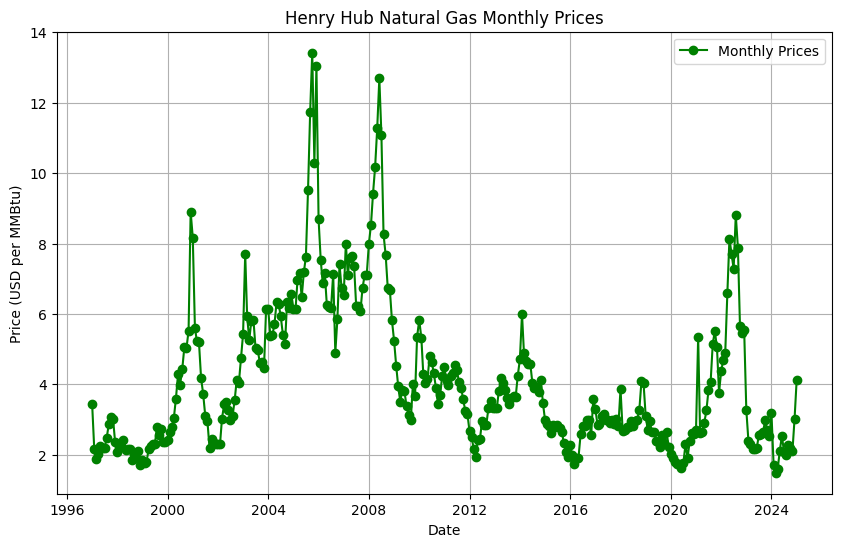

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load monthly data
monthly_df = pd.read_csv("henry_hub_monthly_prices.csv")
monthly_df["Date"] = pd.to_datetime(monthly_df["Date"], format="%b-%Y", errors='coerce')
monthly_df.dropna(subset=["Date"], inplace=True)
monthly_df["Price"] = pd.to_numeric(monthly_df["Price"], errors='coerce')

# Monthly prices plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_df["Date"], monthly_df["Price"], marker='o', linestyle='-', color='green', label='Monthly Prices')
plt.title("Henry Hub Natural Gas Monthly Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD per MMBtu)")
plt.legend()
plt.grid(True)
plt.savefig("henry_hub_monthly_prices.png")  # Save monthly plot as PNG
plt.show()
plt.close()

                            Date  Price Clean_Date
4  1997 Jan-13 to Jan-17 (Day 1)   4.00 1997-01-13
5  1997 Jan-13 to Jan-17 (Day 2)   4.01 1997-01-13
6  1997 Jan-13 to Jan-17 (Day 3)   4.34 1997-01-13
7  1997 Jan-13 to Jan-17 (Day 4)   4.71 1997-01-13
8  1997 Jan-13 to Jan-17 (Day 5)   3.91 1997-01-13


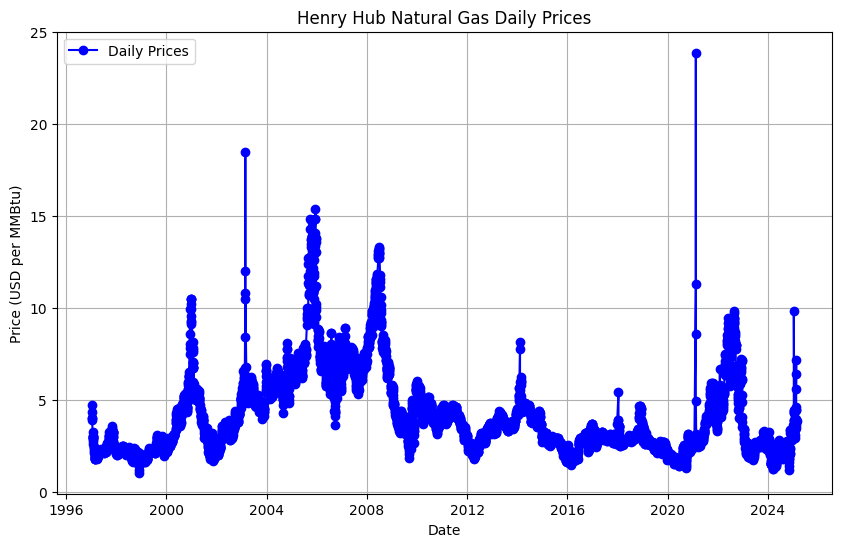

Daily visualizations updated and saved!


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load daily data
daily_df = pd.read_csv("henry_hub_full_week_prices.csv")

# Extract the first date from the date range (like '1997 Jan-6' from '1997 Jan-6 to Jan-10 (Day 2)')
def extract_date(date_string):
    if pd.notna(date_string):
        match = re.search(r'\d{4} \w{3}-\d+', date_string)
        if match:
            return match.group(0)
    return None

daily_df["Clean_Date"] = daily_df["Date"].apply(extract_date)

# Convert Clean_Date to proper datetime
daily_df["Clean_Date"] = pd.to_datetime(daily_df["Clean_Date"], format="%Y %b-%d", errors='coerce')

# Remove any rows where date or price couldn't be parsed
daily_df.dropna(subset=["Clean_Date", "Price"], inplace=True)

# Check if we have valid dates now
print(daily_df.head())

# Plot daily prices
plt.figure(figsize=(10, 6))
plt.plot(daily_df["Clean_Date"], daily_df["Price"], marker='o', linestyle='-', color='blue', label='Daily Prices')
plt.title("Henry Hub Natural Gas Daily Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD per MMBtu)")
plt.legend()
plt.grid(True)
plt.savefig("henry_hub_daily_prices.png")  # Save plot as PNG
plt.show()  # Show plot in Jupyter notebook
plt.close()

print("Daily visualizations updated and saved!")